In [1]:
import pickle
import pandas as pd
%matplotlib inline

In [ ]:
proxy = pd.read_csv('../data/proxy_progress.txt', sep='\t')

proxy['date'] = proxy['time'].map(lambda x: str(x).strip()[0:10])

proxy = proxy.pivot_table(index='date', values=['saved'], aggfunc='sum')
proxy.columns=['proxy']
proxy

In [433]:
local = pd.read_csv('../data/data_scraping.txt', sep='\t', header=None)
local.columns = ['time', 'key_nbr', 'status_code']

local['date'] = local['time'].map(lambda x: str(x).strip()[0:10])

local = local.pivot_table(index='date', values=['key_nbr'], aggfunc='count')
local.columns = ['localhost']
local

,localhost
date,
2018-08-22,687
2018-08-23,972
2018-08-24,1212
2018-08-25,1797
2018-08-26,1404


In [434]:
progress = local.merge(proxy, how='outer', left_index=True, right_index=True)
progress['total'] = progress['localhost'] + progress['proxy']
progress.fillna(int(0))

,localhost,proxy,total
date,,,
2018-08-22,687,0.0,0.0
2018-08-23,972,0.0,0.0
2018-08-24,1212,821.0,2033.0
2018-08-25,1797,1169.0,2966.0
2018-08-26,1404,240.0,1644.0


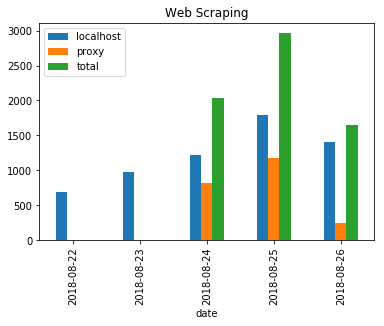

In [435]:
progress.plot(kind='bar', title=('Web Scraping'))

In [431]:
progress['total'].sum(), progress['total'].sum()*20


(6609.0, 132180.0)

In [399]:
5102, 5102*20

(5102, 102040)

In [147]:
with open('../data/yelp_businesses.pickle', 'rb') as pickleReader:
    business_dict = pickle.load(pickleReader)

In [148]:
len(business_dict)

74515

In [154]:
city_state_rating = [[v['location']['city'], v['location']['state'], v['rating']] for k, v in business_dict.items()]


In [158]:
city_state_rating_df = pd.DataFrame(city_state_rating, columns=['city', 'state', 'rating'])

In [161]:
city_state_rating_df.groupby(['city','state']).mean()['rating']

city                   state
Acton                  CA       3.558824
Agoura                 CA       2.666667
Agoura Hills           CA       3.820988
Agua Dulce             CA       3.875000
Ahwatukee              AZ       3.750000
Albany                 NY       3.250000
Albertson              NY       3.500000
Alhambra               CA       3.472917
Aliso Viejo            CA       3.722222
Altadena               CA       3.821429
Anaheim                CA       3.483026
Anaheim Hills          CA       3.318182
Annadale               NY       2.500000
Anthem                 AZ       3.083333
Apache Junction        AZ       3.322368
Arcadia                CA       3.473978
Arizona City           AZ       3.687500
Arleta                 CA       3.021739
Artesia                CA       3.553333
Arverne                NY       2.937500
Astoria                NY       3.842441
Atlantic Beach         NY       4.055556
Atlantic Highlands     NJ       3.794872
Atwater Village        CA   

In [174]:
city_state_rating_df.groupby(['state']).agg(dict(rating='mean', state='count'))

,rating,state
state,,
AL,3.000000,1
AZ,3.450288,9193
BY,3.500000,1
CA,3.599065,38924
CT,4.750000,2
DC,4.250000,2
ELN,5.000000,1
IL,1.000000,1
LA,3.500000,1


In [ ]:
city_state_rating_df.groupby(['state']).agg

In [175]:
business_dict['2sOdnjDUktXwcRt_odk8yQ']

{'transactions': [],
 'name': 'Kôfe',
 'location': {'country': 'US',
  'zip_code': '60666',
  'city': 'Chicago',
  'state': 'IL',
  'address1': "10000 W O'Hare Ave",
  'address2': '',
  'display_address': ["10000 W O'Hare Ave",
   "O'hare International Airport",
   'Chicago, IL 60666'],
  'address3': "O'hare International Airport"},
 'coordinates': {'latitude': 40.701628, 'longitude': -73.674846},
 'is_closed': False,
 'categories': [{'title': 'Coffee & Tea', 'alias': 'coffee'}],
 'url': 'https://www.yelp.com/biz/k%C3%B4fe-chicago?adjust_creative=ihkhZPaVUfUYeK7PoCZp6w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=ihkhZPaVUfUYeK7PoCZp6w',
 'review_count': 1,
 'phone': '',
 'alias': 'kôfe-chicago',
 'image_url': '',
 'distance': 3337.5602078828824,
 'display_phone': '',
 'id': '2sOdnjDUktXwcRt_odk8yQ',
 'rating': 1.0}

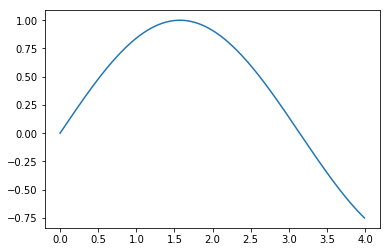

In [184]:
x_data = np.arange(0, 4, .01)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
plt.show()

In [183]:
import numpy as np
import matplotlib.pyplot as plt

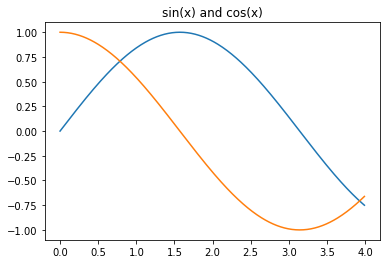

In [185]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_data)
ax.plot(x_data, np.cos(x_data))
ax.set_title('sin(x) and cos(x)')
plt.show()


AttributeError: Unknown property kind

<Figure size 432x288 with 0 Axes>

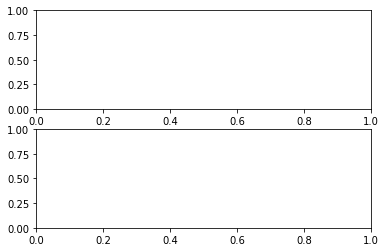

In [187]:
fig = plt.figure()
fig, ax_list = plt.subplots(2, 1)
y_funcs = [np.sin, np.cos]
for subp, y_func in zip(ax_list, y_funcs):
    subp.plot(x_data, kind='bar')

In [188]:
subp.plot?

<BarContainer object of 3 artists>

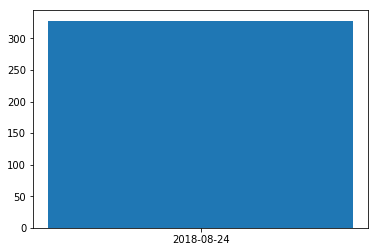

In [214]:
plt.bar(progress.index, progress['proxy'])

In [238]:
def fun_month(month):
    list_rnd = []
    for x in range(5):
        list_rnd.append(np.random.randint(10))
    return list_rnd

In [239]:
label = ['A', 'B', 'C', 'D', 'F']

[[<matplotlib.axes._subplots.AxesSubplot object at 0x13091d4e0>


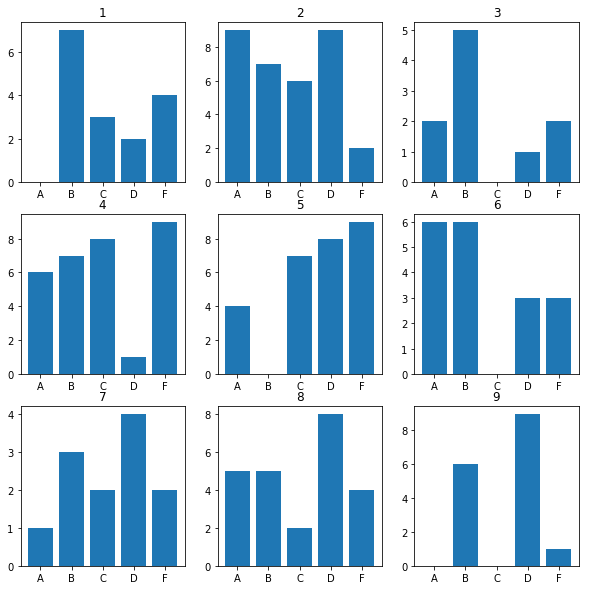

In [253]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
month=0

for ax1, ax2, ax3 in axes:
    month +=1
    ax1.bar(label, fun_month(month))
    ax1.set_title(month)
    month +=1
    ax2.bar(label, fun_month(month))
    ax2.set_title(month)
    month +=1
    ax3.bar(label, fun_month(month))
    ax3.set_title(month)
    

In [236]:
progress.index


Index(['2018-08-22', '2018-08-23', '2018-08-24'], dtype='object', name='date')

In [271]:
import pymongo

In [272]:
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client.yelp
raw_web = db.requests

In [278]:
cur = raw_web.find_one({'fny7AkfDZmRfl4uaL57x5g': { "$exists": True}})

In [283]:
for k, v in cur.items():
    print(k)


_id
fny7AkfDZmRfl4uaL57x5g


In [284]:
cur['fny7AkfDZmRfl4uaL57x5g']

b'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n\n\n    <script>            window.yPageStart = new Date().getTime();\n</script>\n\n    <script>            var initialVisibilityState = document.webkitVisibilityState;\n\n                yPerfTimings = [];\n\n                ySitRepParams = {"clientIP": "167.99.166.163", "datacenter": "us-west-2", "is_internal_ip": false, "edgeStartTime": 153516

In [351]:
test_dict = {'mydate1': '1'}
with open("../data/test_write_binary.pickle", 'wb') as pikl:
    pickle.dump(test_dict, pikl, protocol=2)

In [352]:
test_dict = {'mydate2': '2'}
with open("../data/test_write_binary.pickle", 'r+b') as pikl:
    data = pickle.load(pikl)
    data.update(test_dict)
    pickle.dump(data, pikl, protocol=2)

In [328]:
pikl = open('../data/test_write_binary.pickle')
pikl.seek(0, 2)

29

In [353]:
with open("../data/test_write_binary.pickle", 'rb') as pikl:
    data = pickle.load(pikl)

In [354]:
data

{'mydate1': '1'}

In [2]:
with open('../data/yelp_review.pickle', 'rb') as pickleReader:
    reviews_dict = pickle.load(pickleReader)

In [3]:
len(reviews_dict)

26293

In [84]:
tasks = pd.read_csv('../data/agile_tasks.txt')
tasks

,swim_lane,task,status
0,Data Gathering,Yelp API,Complete
1,Data Gathering,Storage,Complete
2,Data Gathering,Progress Stats,Complete
3,Exploritory Data Analysis,Structure,Complete
4,Exploritory Data Analysis,Summarize,Not Checked Out
5,Exploritory Data Analysis,Charts,Not Checked Out
6,Modeling,Vectorize,Not Checked Out
7,Modeling,Model,Not Checked Out
8,Modeling,Predict,Not Checked Out
9,Modeling,Score,Not Checked Out


In [41]:
    cold = tasks[tasks['status']=='Not Checked Out']['status'].count()
    out = tasks[tasks['status']=='Checked Out']['status'].count()
    complete = tasks[tasks['status']=='Complete']['status'].count()
cold, out, complete

(13, 1, 5)

In [82]:
sl = 'Deployment'
tsk = 'Pickle'
val = tasks[tasks['swim_lane']==sl][tasks['task']==tsk]['status'].index

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
tasks.set_value(val[0], 'status', 'Not Checked Out')
tasks

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,swim_lane,task,status
0,Data Gathering,Yelp API,Complete
1,Data Gathering,Storage,Complete
2,Data Gathering,Progress Stats,Complete
3,Exploritory Data Analysis,Structure,Complete
4,Exploritory Data Analysis,Summarize,Not Checked Out
5,Exploritory Data Analysis,Charts,Not Checked Out
6,Modeling,Vectorize,Not Checked Out
7,Modeling,Model,Not Checked Out
8,Modeling,Predict,Not Checked Out
9,Modeling,Score,Not Checked Out


In [25]:
tasks = [['Data Gathering', 'Yelp API', 'Complete'],
['Data Gathering', 'Storage', 'Complete'],
['Data Gathering', 'Progress Stats', 'Complete'],
['Exploritory Data Analysis', 'Structure', 'Complete'],
['Exploritory Data Analysis', 'Summarize', 'Not Checked Out'],
['Exploritory Data Analysis', 'Charts', 'Not Checked Out'],
['Modeling', 'Vectorize', 'Not Checked Out'],
['Modeling', 'Model', 'Not Checked Out'],
['Modeling', 'Predict', 'Not Checked Out'],
['Modeling', 'Score', 'Not Checked Out'],
['Deployment', 'Pickle', 'Not Checked Out'],
['Deployment', '.py Files', 'Not Checked Out'],
['Deployment', 'MongoDB', 'Not Checked Out'],
['Deployment', 'Templates', 'Not Checked Out'],
['Deployment', 'Flask App', 'Complete'],
['Presentation', 'Outline', 'Not Checked Out'],
['Presentation', 'slides', 'Checked Out'],
['Presentation', 'speech', 'Not Checked Out'],
['Presentation', 'practice', 'Not Checked Out']]

In [26]:
tasks= pd.DataFrame(tasks)

In [35]:
tasks.to_csv('../data/agile_tasks.txt', index=False)

# explore review

In [16]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open('../data/yelp_review.pickle', 'rb') as pickleReader:
    reviews_dict = pickle.load(pickleReader)

In [5]:
type(reviews_dict)

list

In [6]:
reviews_dict[0]

{'bus_id': 'l9hrfKGeERWnuoUghxv5hw',
 'review_id': 'jC-tEN_0NfowFejmOn1cBg',
 'user_name': 'Jason S.',
 'user_city': 'Gilbert',
 'user_state': 'AZ',
 'user_friends': '34',
 'user_reviews': '55',
 'user_photo': '36',
 'review_rating': '5.0',
 'review_date': '8/2/2014',
 'review_text': 'Another 6am bar. Love it! Had a decent Saturday am crowd. Beers are cheap and have a few ciders and micros online. Sweet!',
 'review_useful': '',
 'review_funny': '',
 'review_cool': '',
 '_id': ObjectId('5b847ab83d38dc7c345ab0f3')}

In [7]:
df = pd.DataFrame(reviews_dict)

In [12]:
rating_totals = df.groupby('review_rating')['bus_id'].count()

In [20]:
type(rating_totals)

pandas.core.series.Series

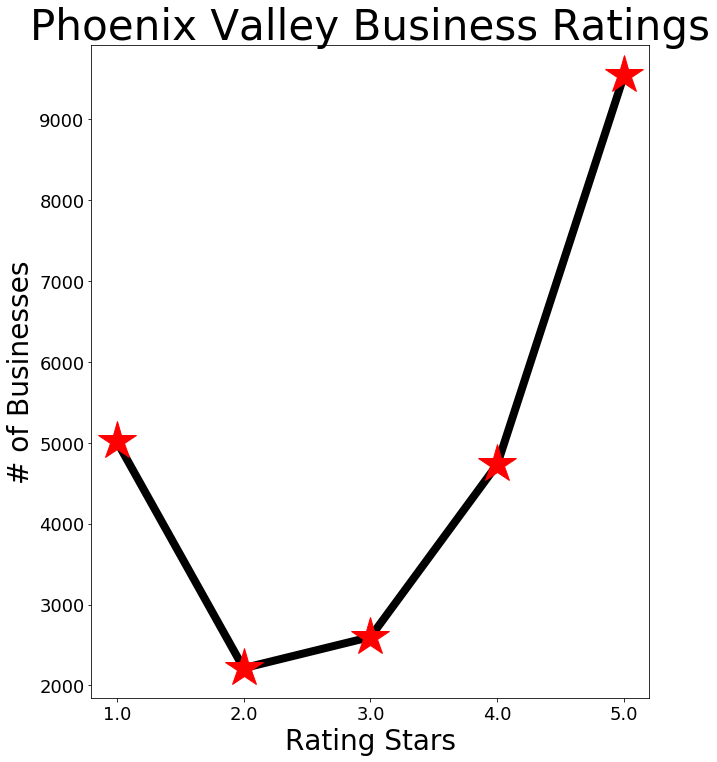

In [67]:
plt.figure(figsize=(10,12))
plt.plot(rating_totals.index, rating_totals, color='black', linewidth=8)
plt.plot(rating_totals.index, rating_totals, marker= '*', color='red', linestyle='None', markersize=40)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Rating Stars', fontsize=28)
plt.ylabel('# of Businesses', fontsize=28)
plt.title('Phoenix Valley Business Ratings', fontsize=42)
plt.savefig('../img/Phoenix_Star_Totals.png')
plt.show()

In [69]:
df.describe()

,_id,bus_id,review_cool,review_date,review_funny,review_id,review_rating,review_text,review_useful,user_city,user_friends,user_name,user_photo,user_reviews,user_state
count,26293,26293,24109,24109,24109,26293,24109,24109,24109,24109,24109,24109,17085,24109,24109
unique,26293,1567,78,2399,59,26288,5,24103,86,1785,829,11308,1040,746,146
top,5b847ab83d38dc7c345ac5ce,J3H6VSIgUTlACkb_HPFA8w,,8/18/2018,,x5b9ILsCRLrSHnwcIp7ubw,5.0,This park was remodeled in 2014. The playgroun...,,Phoenix,0,Deni G.,1,2,AZ
freq,1,81,18243,132,19174,2,9545,2,14071,6517,5811,50,1834,1037,18503


In [77]:
rm_na = df[df['user_reviews']!=np.nan]

In [85]:
rm_na['user_reviews'] = rm_na['user_reviews'].astype(float)

In [144]:
rm_na['review_rating'] = rm_na['review_rating'].astype(float)

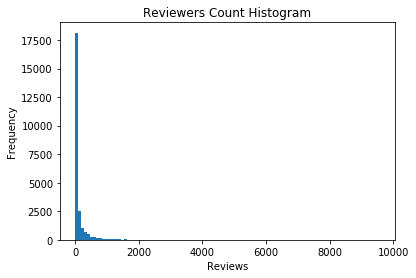

In [147]:
plt.hist(rm_na['user_reviews'].dropna(), bins=100)
plt.title("Reviewers Count Histogram")
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()

In [128]:
rm_na

,_id,bus_id,review_cool,review_date,review_funny,review_id,review_rating,review_text,review_useful,user_city,user_friends,user_name,user_photo,user_reviews,user_state
0,5b847ab83d38dc7c345ab0f3,l9hrfKGeERWnuoUghxv5hw,,8/2/2014,,jC-tEN_0NfowFejmOn1cBg,5.0,Another 6am bar. Love it! Had a decent Saturda...,,Gilbert,34,Jason S.,36,55.0,AZ
1,5b847ab83d38dc7c345ab0f4,l9hrfKGeERWnuoUghxv5hw,,4/29/2018,,n0c9OhaN2D7lICXqgt4fqg,1.0,Ok if you're a person with class avoid this pl...,,Gilbert,25,Stephanie M.,660,110.0,AZ
2,5b847ab83d38dc7c345ab0f5,l9hrfKGeERWnuoUghxv5hw,,2/17/2016,6,dAq6mUvE45qFiSrtvGoCHA,2.0,if you're in the mood for a cheap drink and a ...,1,Gilbert,7,Train W.,1,53.0,AZ
3,5b847ab83d38dc7c345ab0f6,l9hrfKGeERWnuoUghxv5hw,,10/16/2012,5,jYoiZCKSCTbzKcUBwZ7gQw,1.0,I use to go to this place a lot as a 21 year o...,2,Gilbert,0,Train W.,NaN,16.0,AZ
4,5b847ab83d38dc7c345ab0f7,l9hrfKGeERWnuoUghxv5hw,,4/9/2011,2,y9y9Fv7vwxtRvKg4Pvb8Yg,3.0,I have gone to this bar quite a few times for ...,,Phoenix,385,Jennifer O.,79,1900.0,AZ
5,5b847ab83d38dc7c345ab0f8,TwVg1J7VMkV53L3Tv6ak1w,1,9/2/2013,,5WTzN-64E7FkS7wUKDiCKQ,5.0,What a great park! Clean and never over crowde...,2,Phoenix,25,Beca W.,2,23.0,AZ
6,5b847ab83d38dc7c345ab0f9,nKjpfthuOwNy6iB6R9YRLQ,1,7/21/2015,1,qD558o-akv4-CeC7EU1z1A,5.0,Didn't know you could write a review on a non ...,2,Phoenix,14,Nicholas J.,4,29.0,AZ
7,5b847ab83d38dc7c345ab0fa,nKjpfthuOwNy6iB6R9YRLQ,,2/11/2015,,x5b9ILsCRLrSHnwcIp7ubw,5.0,Nice park now that it has been renovated. The ...,1,Phoenix,264,Will S.,35,50.0,AZ
8,5b847ab83d38dc7c345ab0fb,nKjpfthuOwNy6iB6R9YRLQ,,10/18/2014,,kXkX7Mq4wrdwtoSoCk6uLQ,4.0,This park was remodeled in 2014. The playgroun...,2,Phoenix,1,Melissa T.,7,5.0,AZ
9,5b847ab83d38dc7c345ab0fc,nKjpfthuOwNy6iB6R9YRLQ,,5/24/2015,,Cl0a31tqXMxGP7xUELMN7Q,3.0,The address for this park is so completely wro...,1,Phoenix,22,Chris T.,19,39.0,AZ


In [129]:
rm_na.pivot_table(index='review_rating',values='user_reviews', aggfunc=['count','min','mean','max'])

,count,min,mean,max
,user_reviews,user_reviews,user_reviews,user_reviews
review_rating,,,,
1.0,5018,1.0,35.573735,4191.0
2.0,2214,1.0,109.828817,4470.0
3.0,2599,1.0,199.808003,9558.0
4.0,4733,1.0,189.701247,4648.0
5.0,9545,1.0,81.308329,9558.0


In [190]:
rm_na[rm_na['user_reviews']==9558]

,_id,bus_id,review_cool,review_date,review_funny,review_id,review_rating,review_text,review_useful,user_city,user_friends,user_name,user_photo,user_reviews,user_state
11394,5b847ab83d38dc7c345add75,-0KqNhmK40DTzwUPM_Ik9g,11,9/4/2016,6,RoLwn9aOV-OPzFQa8IkWjQ,5.0,Located on the Government Mall in front of the...,8,Charlotte,1506,Bruce K.,19623,9558.0,NC
13061,5b847ab83d38dc7c345ae3f8,ivYI5FZ7ULlfaqsc-wIVSQ,11,9/8/2016,11,TVMSftJVcgrGWJ-1HcHKjw,3.0,Not much in this terminal with Delta Airlines....,12,Charlotte,1506,Bruce K.,19623,9558.0,NC


In [150]:
rm_na.pivot_table(index='user_reviews',values='review_rating', aggfunc=['count','min','mean','max'])

,count,min,mean,max
,review_rating,review_rating,review_rating,review_rating
user_reviews,,,,
1.0,1009,1.0,3.089197,5.0
2.0,1037,1.0,3.088717,5.0
3.0,1030,1.0,3.074757,5.0
4.0,863,1.0,3.165701,5.0
5.0,796,1.0,3.262563,5.0
6.0,674,1.0,3.265579,5.0
7.0,628,1.0,3.191083,5.0
8.0,620,1.0,3.245161,5.0


In [192]:
rm_na[rm_na['user_state']=='Anchorage']

,_id,bus_id,review_cool,review_date,review_funny,review_id,review_rating,review_text,review_useful,user_city,user_friends,user_name,user_photo,user_reviews,user_state
11211,5b847ab83d38dc7c345adcbe,i0sp8DNw3FolMn-uGIkVyw,,7/7/2018,,hycXcHXp7fa9Z5d_EsWYdA,2.0,No lettuce and tomato and no special sauce on ...,,Taku / Campbell,0,Jacqui M.,NaN,3.0,Anchorage


In [191]:
rm_na.pivot_table(index='user_state',values='review_rating', aggfunc=['count','min','mean','max'])

,count,min,mean,max
,review_rating,review_rating,review_rating,review_rating
user_state,,,,
AK,20,1.0,3.850000,5.0
AL,11,2.0,4.454545,5.0
AR,14,1.0,3.785714,5.0
AZ,18503,1.0,3.446360,5.0
Anchorage,1,2.0,2.000000,2.0
Atlanta,1,5.0,5.000000,5.0
Austin,1,5.0,5.000000,5.0
Australia,4,2.0,4.250000,5.0


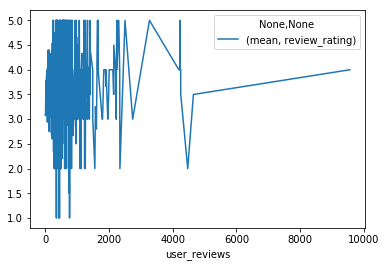

In [187]:
fig, ax = plt.subplots(figsize=(10,8))
rm_na.pivot_table(index='user_reviews',values='review_rating', aggfunc=['mean']).plot()
plt.show()

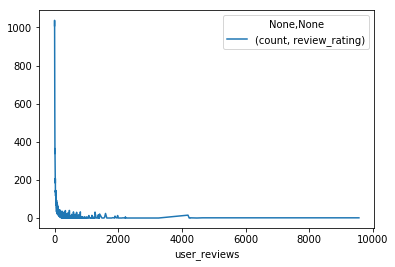

In [152]:
rm_na.pivot_table(index='user_reviews',values='review_rating', aggfunc=['count']).plot()

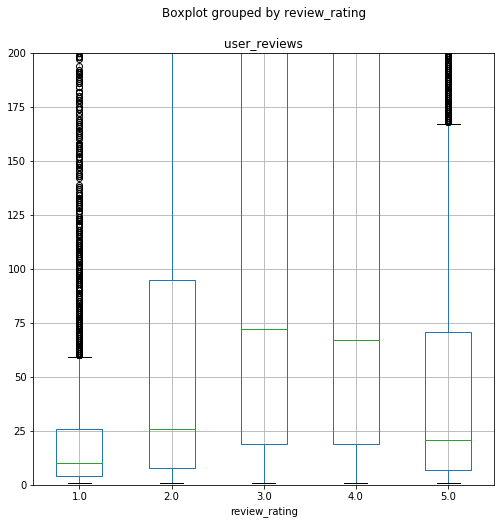

In [184]:
fig, ax = plt.subplots(figsize=(8,8))
box = rm_na.boxplot(column='user_reviews', by='review_rating', ax=ax)
#df.boxplot(ax=ax, sym='') 
ax.set_ylim(0,200)

plt.show()

In [176]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_o

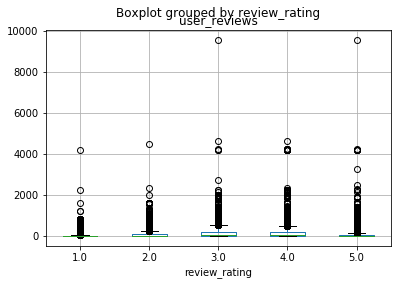

In [182]:
rm_na.boxplot(column='user_reviews', by='review_rating')

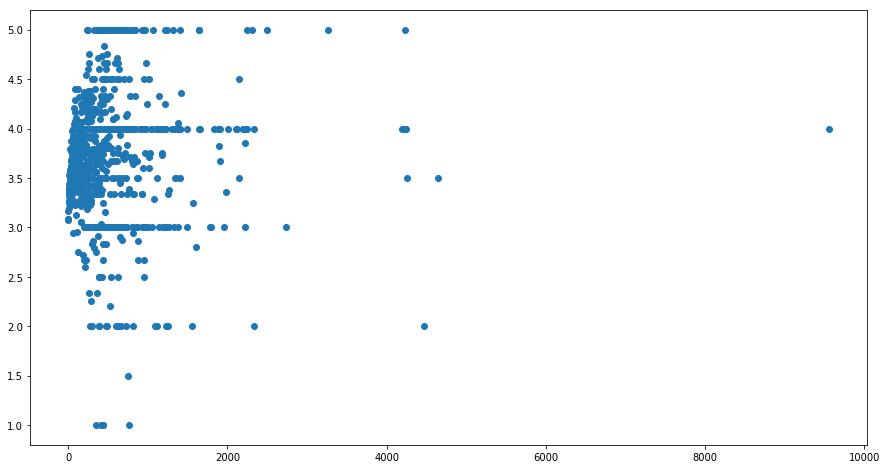

In [159]:
plt.figure(figsize=(15,8))
plt.plot(rm_na.pivot_table(index='user_reviews',values='review_rating', aggfunc=['mean']), marker='o', ls='None')

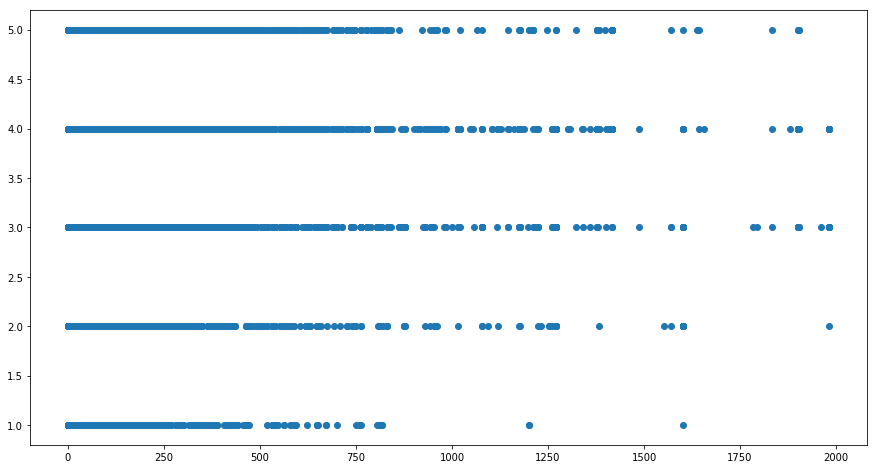

In [189]:
plt.figure(figsize=(15,8))
plt.plot(rm_na[rm_na['user_reviews']<2000]['user_reviews'],rm_na[rm_na['user_reviews']<2000]['review_rating'], marker='o', ls='None')

In [164]:
plt.boxplot?

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


{'whiskers': [<matplotlib.lines.Line2D at 0x131205f28>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x13109a860>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x131205e10>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x1310a10f0>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x1310a1518>,
  ...],
 'means': []}

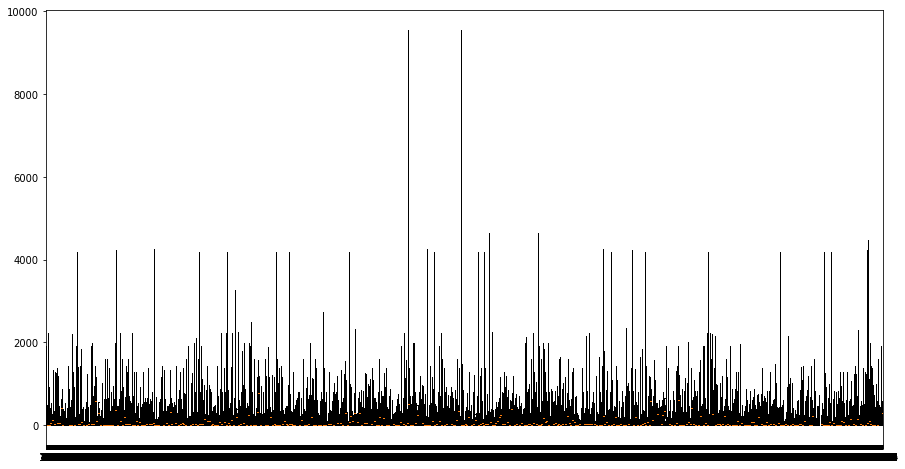

In [165]:
plt.figure(figsize=(15,8))
plt.boxplot(rm_na[['user_reviews','review_rating']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4ea4e0>,
      dtype=object)

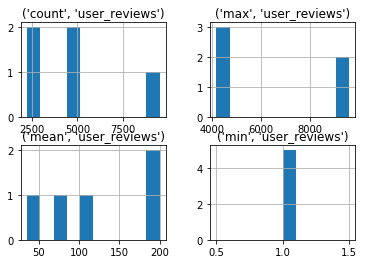

In [97]:
rm_na.pivot_table(index='review_rating',values='user_reviews', aggfunc=['count','min','mean','max']).hist()



In [90]:
rm_na.pivot_table?

In [101]:
rm_na.pivot_table(index='review_id', columns='review_rating', values='user_reviews').hist?


In [105]:
review_summary = rm_na.pivot_table(index='review_id', columns='review_rating', values='user_reviews')

In [116]:
review_summary[review_summary['1.0']<1000]['1.0'].dropna()

review_id
-06vEGOIol6N5LzfRm03_Q     17.0
-1c-UGlEch2X8mzkfA3FmA      4.0
-2iMKaUMwopWpcSGjUk-2A    149.0
-4QcZP0gJwgt1tq-DDYI-g      7.0
-5fJfGZfk1in6IBArrBByg     18.0
-689sXcpB0BoNiWe9Fz0Uw     18.0
-6AhcvcP0NI6D56uR0kX0A      7.0
-6qJvNzt6GJfv3NS8XPqlg     15.0
-7B1pk05I1tqO_L6w7JpuA      3.0
-7HJDg7Q4FF0REgvKsA06w      3.0
-9dIGM_xTGxNpeFhnzol1Q      9.0
-AfqicePDJ-8F7NKrwVRUA     24.0
-Ak-8GxzbQjBZFOPyAIPow     33.0
-Byhv7GbhlHi8c2QbKDKsw      8.0
-CErTMdsqOjHlXAYsDu5kA      3.0
-CeYUHEBkyGfwt82MZ3Q5g     17.0
-CuZ9gOji1kKVcmf-o7oBw     15.0
-EY4dSYPjlWE3Sh_-VgOiA      3.0
-EtMPhsbd-A2LOgyoOsCxQ     97.0
-Gopu7MpqdJwkFGhnUvVQw      2.0
-Gu4H2uTJ98BqZ0sqCNcnQ     50.0
-H4UgDrhNRgVaj6vG55ENA     18.0
-HjzGwuAz_Wb59zeewTW-Q      8.0
-J8m5eNU2zlIGsMB7ziymw     75.0
-KD9qrWNkxxfzGygJrJ0cQ      4.0
-MeZnpADTjZdhgVG-Px37g      4.0
-MedcOr63judZ2ovh6Ok0w     66.0
-NTtKjz0hyZDdFnDFuJA1Q      2.0
-Oe0uoJmNh1ZtGZz--GzjQ     22.0
-Oo8gB47EZQf-fqu-l_V8A     10.0
                          ... 

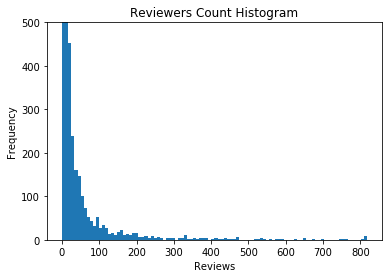

In [135]:
plt.hist(review_summary[review_summary['1.0']<1000]['1.0'].dropna(), bins=100)
plt.title("Reviewers Count Histogram")
plt.ylim(0,500)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()

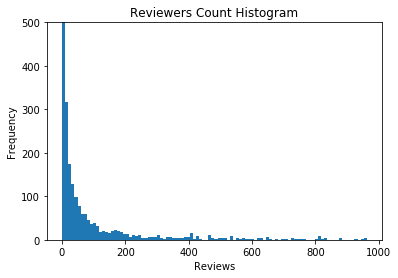

In [136]:
plt.hist(review_summary[review_summary['2.0']<1000]['2.0'].dropna(), bins=100)
plt.title("Reviewers Count Histogram")
plt.ylim(0,500)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()

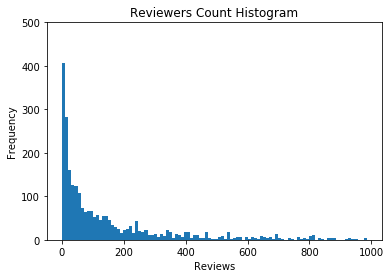

In [137]:
plt.hist(review_summary[review_summary['3.0']<1000]['3.0'].dropna(), bins=100)
plt.title("Reviewers Count Histogram")
plt.ylim(0,500)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()

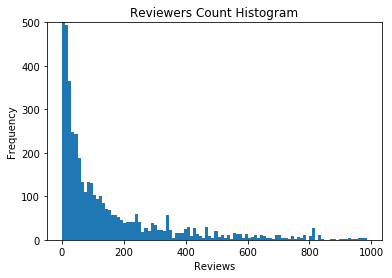

In [138]:
plt.hist(review_summary[review_summary['4.0']<1000]['4.0'].dropna(), bins=100)
plt.title("Reviewers Count Histogram")
plt.ylim(0,500)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()

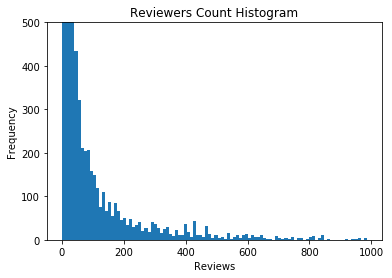

In [139]:
plt.hist(review_summary[review_summary['5.0']<1000]['5.0'].dropna(), bins=100)
plt.title("Reviewers Count Histogram")
plt.ylim(0,500)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()

KeyboardInterrupt: 

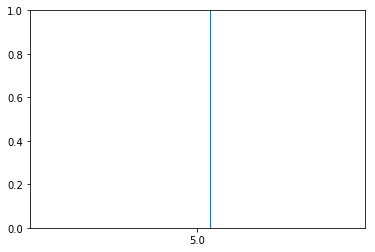

In [124]:
plt.hist(df['review_rating'].dropna(), bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f13be10>,
      dtype=object)

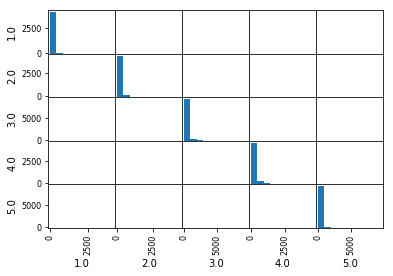

In [143]:
pd.plotting.scatter_matrix(review_summary)

In [ ]:
plt.hist(rm_na[review_summary['3.0']<1000]['3.0'].dropna(), bins=100)
plt.title("Reviewers Count Histogram")
plt.ylim(0,500)
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()